In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from geopy.distance import geodesic

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [4]:
# Display the first few rows of the dataset
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


from matplotlib import pyplot as plt
_df_0['trip_duration'].plot(kind='hist', bins=20, title='trip_duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['distance_traveled'].plot(kind='hist', bins=20, title='distance_traveled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['num_of_passengers'].plot(kind='hist', bins=20, title='num_of_passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['fare'].plot(kind='hist', bins=20, title='fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='trip_duration', y='distance_traveled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='distance_traveled', y='num_of_passengers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='num_of_passengers', y='fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='fare', y='tip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['trip_duration'].plot(kind='line', figsize=(8, 4), title='trip_duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['distance_traveled'].plot(kind='line', figsize=(8, 4), title='distance_traveled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['num_of_passengers'].plot(kind='line', figsize=(8, 4), title='num_of_passengers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['fare'].plot(kind='line', figsize=(8, 4), title='fare')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.shape

(209673, 8)

In [ ]:
# Display summary statistics of numerical features
print(df.describe())

       trip_duration  distance_traveled  num_of_passengers           fare  \
count  209673.000000      209673.000000      209673.000000  209673.000000   
mean     1173.181478           5.054431           1.292808      99.623431   
std      4775.653621         125.217419           0.930754      85.602702   
min         0.000000           0.020000           0.000000       0.000000   
25%       446.000000           1.950000           1.000000      52.500000   
50%       707.000000           3.200000           1.000000      75.000000   
75%      1098.000000           5.730000           1.000000     116.250000   
max     86387.000000       57283.910000           9.000000    4466.250000   

                 tip  miscellaneous_fees     total_fare  surge_applied  
count  209673.000000       209673.000000  209673.000000  209673.000000  
mean       13.030824           15.136829     127.791084       0.280523  
std        20.367764           12.553436      98.797374       0.449256  
min         0.

In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB
None


In [ ]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [ ]:
df.isnull()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
209668,False,False,False,False,False,False,False,False
209669,False,False,False,False,False,False,False,False
209670,False,False,False,False,False,False,False,False
209671,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [ ]:
# There are no Null values.

# Data Cleaning

In [ ]:
# Convert 'trip_duration' from seconds to minutes
df['trip_duration'] = df['trip_duration'] / 60

In [ ]:

# Verify the changes
print(df['trip_duration'])


0         12.466667
1         19.783333
2         12.166667
3         11.183333
4          5.483333
            ...    
209668    26.950000
209669     7.300000
209670     9.516667
209671     8.183333
209672    60.233333
Name: trip_duration, Length: 209673, dtype: float64


In [ ]:
df['distance_traveled'].describe()

count    209673.000000
mean          5.054431
std         125.217419
min           0.020000
25%           1.950000
50%           3.200000
75%           5.730000
max       57283.910000
Name: distance_traveled, dtype: float64

In [ ]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,12.466667,2.75,1.0,75.00,24,6.300,105.300,0
1,19.783333,3.43,1.0,105.00,24,13.200,142.200,0
2,12.166667,3.12,1.0,71.25,0,26.625,97.875,1
3,11.183333,5.63,3.0,90.00,0,9.750,99.750,0
4,5.483333,2.09,1.0,45.00,12,13.200,70.200,0


<Axes: >

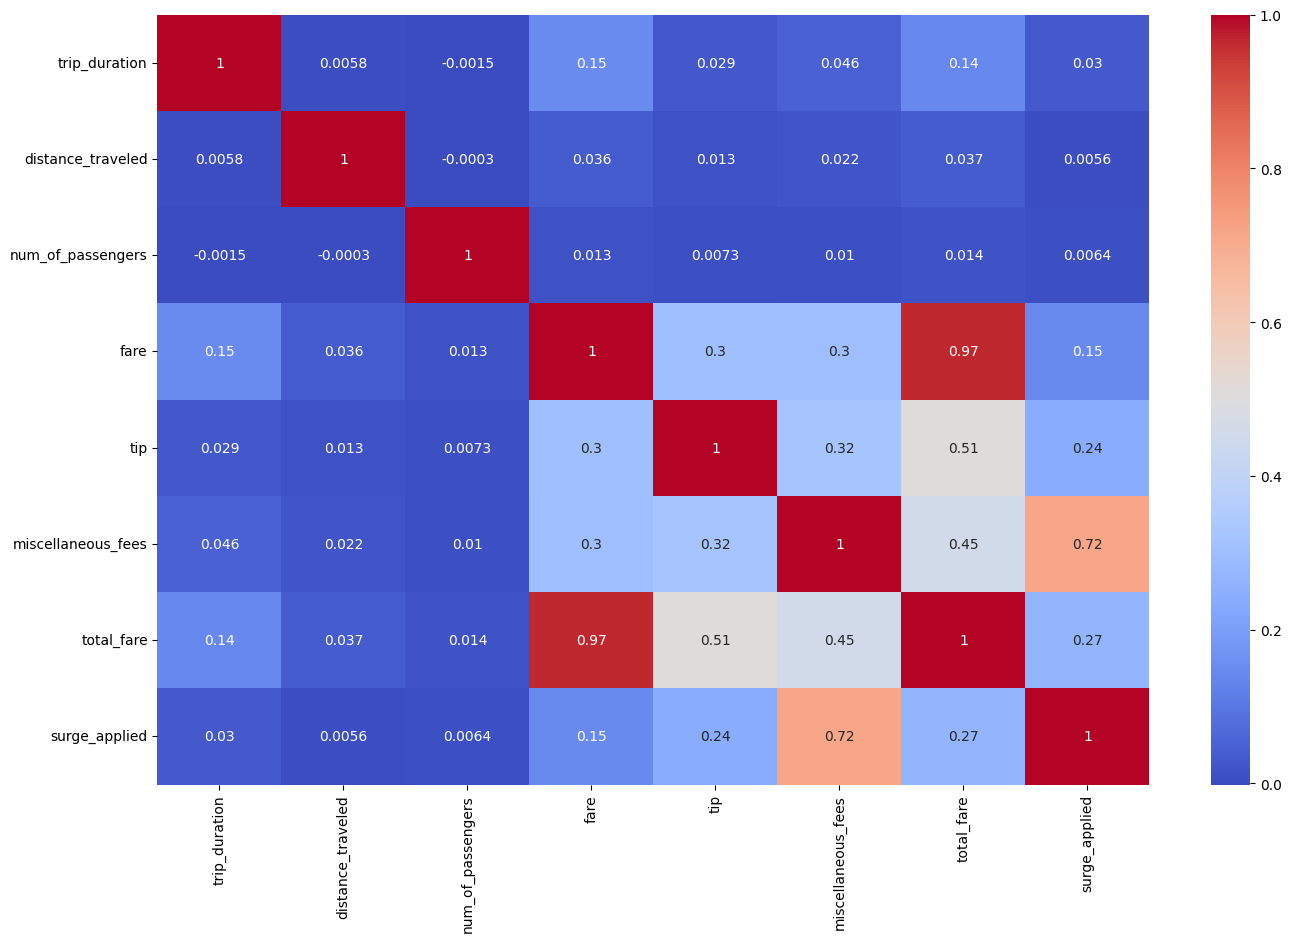

In [ ]:
correlation = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

<Axes: xlabel='total_fare', ylabel='distance_traveled'>

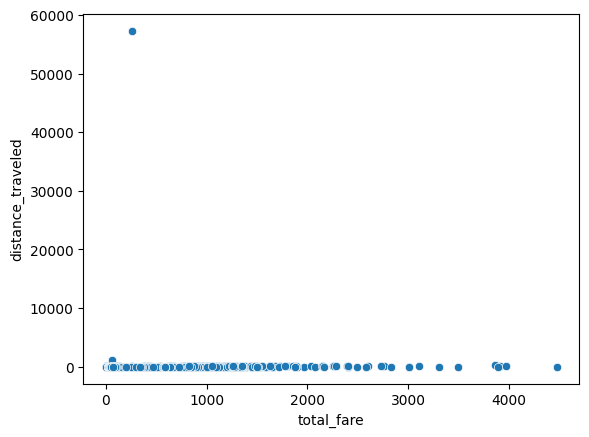

In [9]:
sns.scatterplot(data=df, x="total_fare", y="distance_traveled")

In [ ]:
# There is no relationship between the total_fare &  distance_traveled.

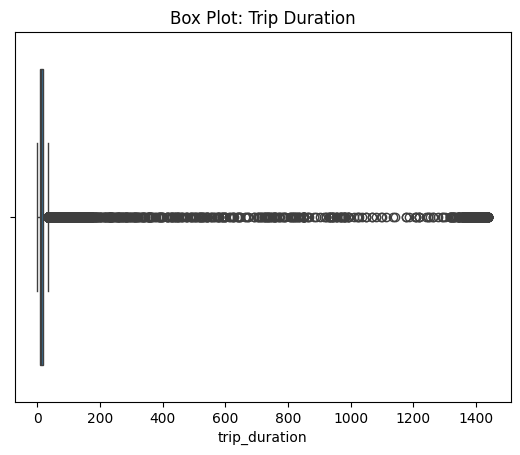

In [ ]:
# Box plot for 'trip_duration'
sns.boxplot(x='trip_duration', data=df)
plt.title('Box Plot: Trip Duration')
plt.show()

In [ ]:
df['trip_duration'].describe()

count    209673.000000
mean         19.553025
std          79.594227
min           0.000000
25%           7.433333
50%          11.783333
75%          18.300000
max        1439.783333
Name: trip_duration, dtype: float64

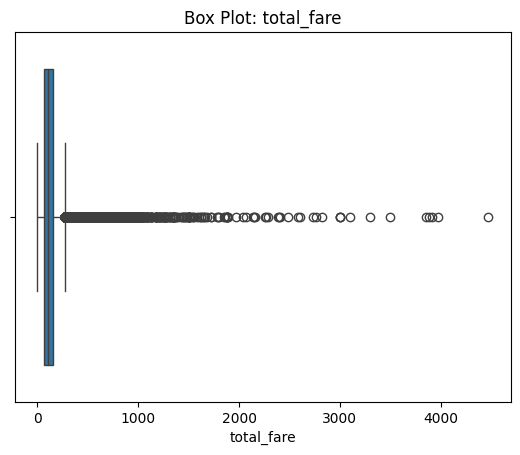

In [ ]:
# Box plot for 'total_fare'
sns.boxplot(x='total_fare', data=df)
plt.title('Box Plot: total_fare')
plt.show()

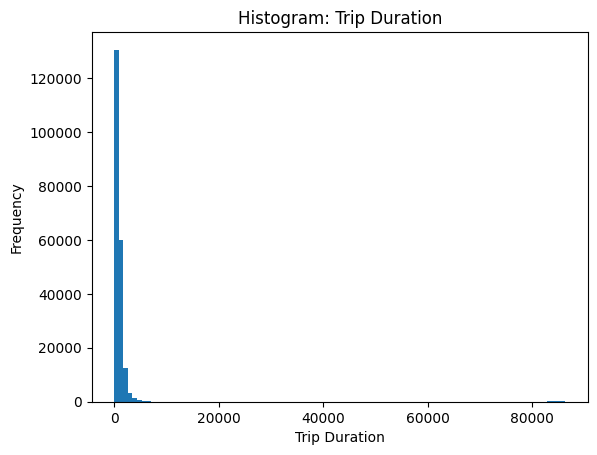

In [11]:
# Histogram for 'trip_duration'
plt.hist(df['trip_duration'], bins=100)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Histogram: Trip Duration')
plt.show()


In [13]:
df['trip_duration'].max()

86387.0

In [ ]:
df['total_fare'].mean()

127.79108397361607

In [ ]:
df['total_fare'].mode().value_counts()

58.5    1
Name: total_fare, dtype: int64

In [ ]:
# Feature Engineering Function
def feature_engineering(df):
    # Calculate distance based on distance_traveled
    df['distance'] = df['distance_traveled']

    # Extract additional features from fare and tip
    df['fare_per_distance'] = df['fare'] / df['distance']
    df['tip_percentage'] = (df['tip'] / df['total_fare']) * 100

    # Drop unnecessary columns after feature engineering
    df.drop(['distance_traveled'], axis=1, inplace=True)

    return df

In [ ]:
# Apply feature engineering to the entire dataset
df = feature_engineering(df)

In [ ]:
print(df.head())

   trip_duration  num_of_passengers    fare  tip  miscellaneous_fees  \
0      12.466667                1.0   75.00   24               6.300   
1      19.783333                1.0  105.00   24              13.200   
2      12.166667                1.0   71.25    0              26.625   
3      11.183333                3.0   90.00    0               9.750   
4       5.483333                1.0   45.00   12              13.200   

   total_fare  surge_applied  distance  fare_per_distance  tip_percentage  
0     105.300              0      2.75          27.272727       22.792023  
1     142.200              0      3.43          30.612245       16.877637  
2      97.875              1      3.12          22.836538        0.000000  
3      99.750              0      5.63          15.985790        0.000000  
4      70.200              0      2.09          21.531100       17.094017  


In [ ]:
X = df.drop('total_fare', axis=1)  # Features
y = df['total_fare']  # Target variable


In [ ]:
# Selecting relevant columns as features
feature_columns = ['trip_duration', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'surge_applied']
x = df[feature_columns]
y = df['total_fare']

# Multiple Linear Regression

In [ ]:
# Separate independent variables (features) and dependent variable (target)
X = df[['trip_duration', 'distance', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'surge_applied']]
y = df['total_fare']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.486897469612444e-14
Mean Squared Error: 4.6370382907765456e-27
Root Mean Squared Error: 6.809580229923534e-14


In [ ]:
# Print the coefficients
print('Coefficients:', model.coef_)

Coefficients: [-4.52017054e-16  4.44089210e-16  3.29634391e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00  6.02599567e-16]


In [ ]:
# Print the intercept
print('Intercept:', model.intercept_)

Intercept: -5.684341886080802e-14


# cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Choose the number of folds for cross-validation (e.g., 5 )
num_folds = 5

In [ ]:
# Define the cross-validation strategy (e.g., KFold)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [ ]:
# Perform cross-validation and compute mean squared error for each fold
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)


In [ ]:
# Convert negative mean squared error to positive (since scikit-learn returns negated values)
mse_scores = -mse_scores

In [ ]:
# Compute the mean and standard deviation of the MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

In [ ]:
# Print the results
print(f'Mean Squared Error (across {num_folds} folds): {mean_mse:.4f} +/- {std_mse:.4f}')


Mean Squared Error (across 5 folds): 0.0000 +/- 0.0000


# K-NN

In [ ]:
# Create a k-nearest neighbors regressor
knn_model = KNeighborsRegressor(n_neighbors=6)  # You can adjust the number of neighbors as needed

In [ ]:
# Train the model on the training set
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [ ]:
# Make predictions on the testing set
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluate the model
print('Mean Absolute Error (KNN):', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error (KNN):', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error (KNN):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error (KNN): 0.45914003815428756
Mean Squared Error (KNN): 20.224543419130796
Root Mean Squared Error (KNN): 4.497170601515001


# Random Forest

In [ ]:
# Create a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed


In [ ]:
# Train the model on the training set
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print('Mean Absolute Error (Random Forest):', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error (Random Forest):', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error (Random Forest):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error (Random Forest): 0.2927856206033666
Mean Squared Error (Random Forest): 45.809321247594525
Root Mean Squared Error (Random Forest): 6.768258361468963
